In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from math import log, e
from pandas.api.types import is_numeric_dtype
import io
#from google.colab import files
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import graphviz
import io
import pydotplus
from statistics import mean
from IPython.display import Image, display
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc,classification_report,roc_auc_score,plot_confusion_matrix

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import LeaveOneOut

In [4]:
df = pd.read_csv('New_assignmnet_data_set_random_10.csv')

In [5]:
df

,product_recall,Strat_imp,Opport_behav,Admin_control,Avail_altern,Switch_cost,Trust,Relat_commit
0,0,5.432,21.728,9.506,24.444,4.074,20.370,12.222
1,0,5.432,13.580,5.432,25.802,6.790,9.506,6.790
2,1,23.086,17.654,21.728,9.506,25.802,21.728,21.728
3,0,6.790,20.370,8.148,25.802,5.432,10.864,9.506
4,0,8.148,17.654,6.790,25.802,5.432,17.654,8.148
...,...,...,...,...,...,...,...,...
451,0,8.400,22.000,6.400,43.200,6.300,24.000,13.600
452,0,8.000,35.200,13.600,31.500,6.300,12.000,16.100
453,1,5.432,13.580,5.432,25.802,6.790,9.506,6.790
454,0,10.864,25.802,24.444,25.802,6.790,8.148,8.148


In [6]:
imp_features4 = ['Strat_imp', 'Opport_behav', 'Admin_control','Avail_altern', 'Switch_cost', 'Trust', 'Relat_commit']

In [7]:
model = DecisionTreeClassifier(max_depth=4)

In [8]:
product_recall = ['Low_Recall', 'High_Recall']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[imp_features4],df['product_recall'],test_size=0.3)
dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train, y_train)  
pred = dtree.predict(X_test)  

In [10]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

[Text(485.46, 733.86, 'X[4] <= 20.085\ngini = 0.471\nsamples = 319\nvalue = [198, 121]'),
 Text(267.84, 570.78, 'X[4] <= 6.15\ngini = 0.182\nsamples = 197\nvalue = [177, 20]'),
 Text(133.92, 407.70000000000005, 'X[0] <= 21.049\ngini = 0.449\nsamples = 47\nvalue = [31, 16]'),
 Text(66.96, 244.62, 'X[5] <= 8.827\ngini = 0.381\nsamples = 39\nvalue = [29, 10]'),
 Text(33.48, 81.54000000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(100.44, 81.54000000000008, 'gini = 0.361\nsamples = 38\nvalue = [29, 9]'),
 Text(200.88, 244.62, 'X[2] <= 17.654\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(167.39999999999998, 81.54000000000008, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(234.35999999999999, 81.54000000000008, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(401.76, 407.70000000000005, 'X[1] <= 16.975\ngini = 0.052\nsamples = 150\nvalue = [146, 4]'),
 Text(334.79999999999995, 244.62, 'X[2] <= 18.333\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(301.32, 81.5400

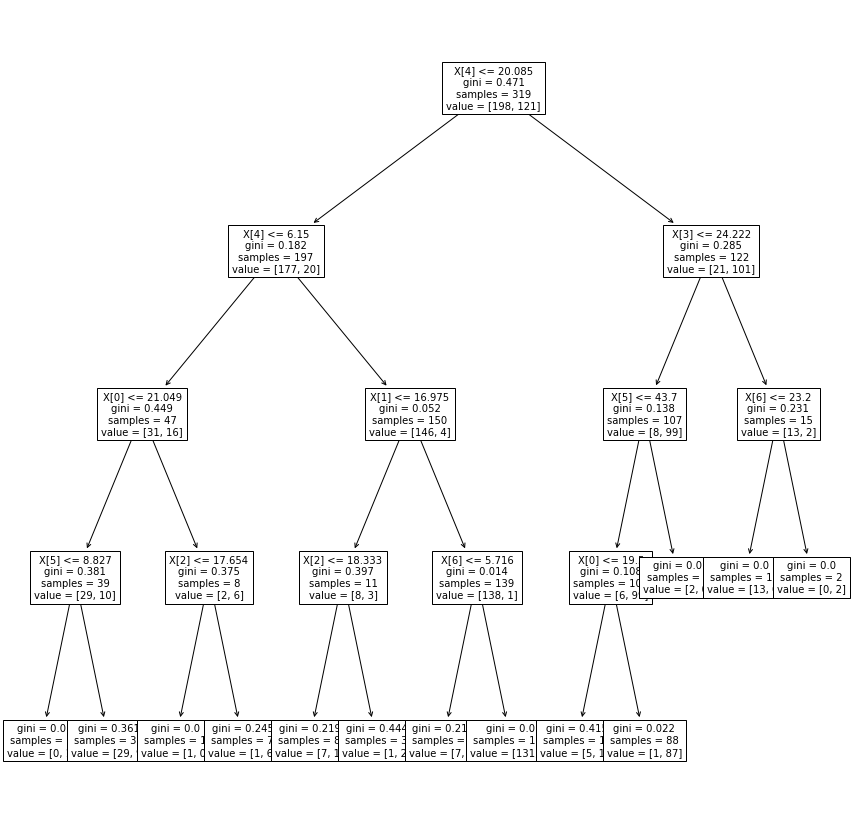

In [11]:
#Map with a particular depth (code changed from AD's PDF)
plt.subplots(figsize=(15, 15))
tree.plot_tree(dtree,fontsize=10,max_depth=4)

In [12]:
dtree_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)
dtree_gini.fit(X_train, y_train)
pred_gini = dtree_gini.predict(X_test)
print('Criterion = gini :', accuracy_score(y_test, pred_gini))
dtree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtree_entropy.fit(X_train, y_train)
pred_entropy = dtree_entropy.predict(X_test)
print('Criterion = entropy : ', accuracy_score(y_test, pred_entropy))

Criterion = gini : 0.9197080291970803
Criterion = entropy :  0.9051094890510949


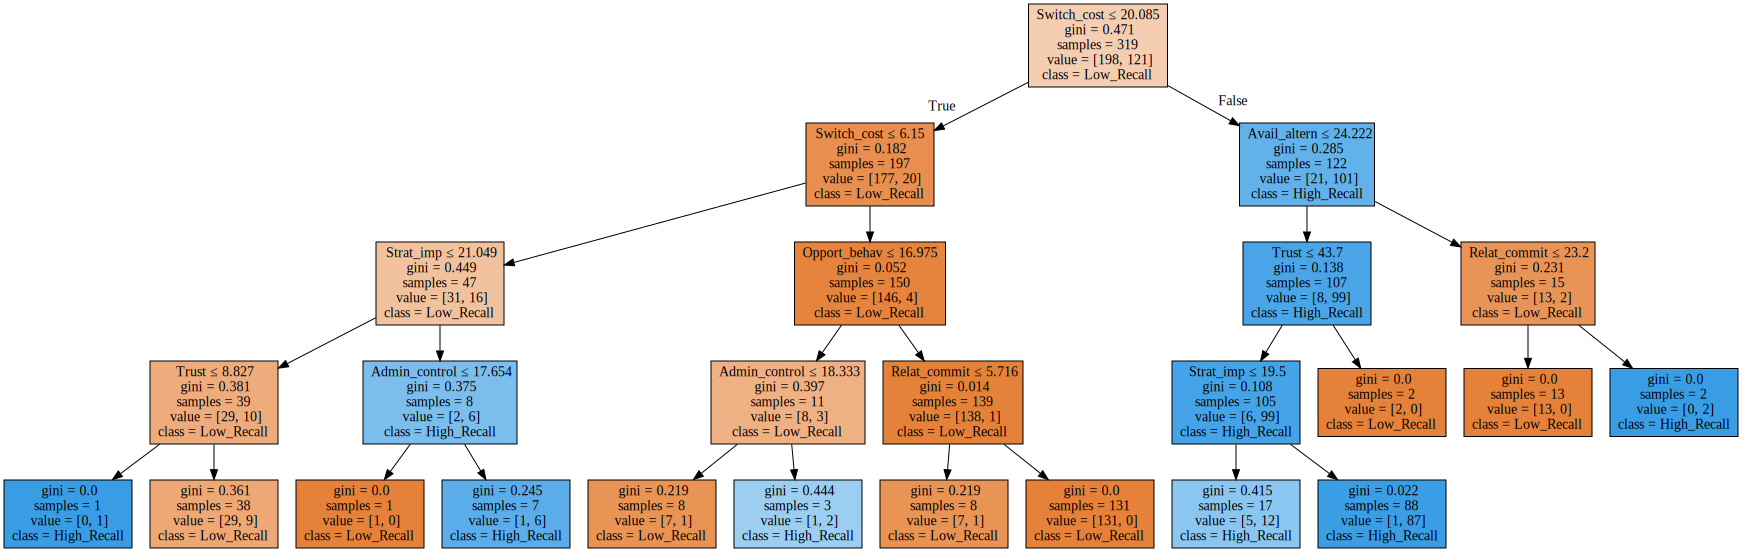

In [13]:
dt_plot = graphviz.Source(tree.export_graphviz(dtree,out_file=None,feature_names=imp_features4, class_names= product_recall,filled=True,special_characters=True,max_depth=4))
dt_plot

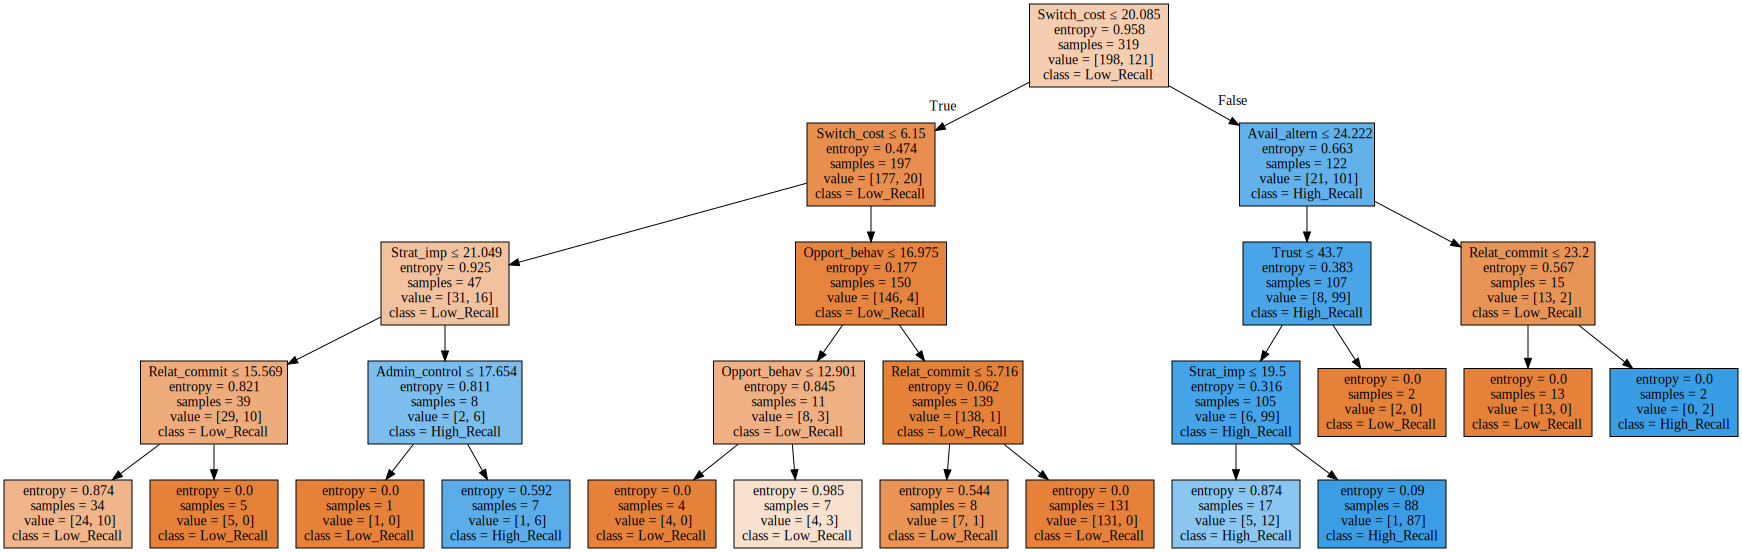

In [14]:
dt_plot_e = graphviz.Source(tree.export_graphviz(dtree_entropy,out_file=None,feature_names=imp_features4,class_names=product_recall, filled=True,special_characters=True,max_depth=4))
dt_plot_e

<AxesSubplot:>

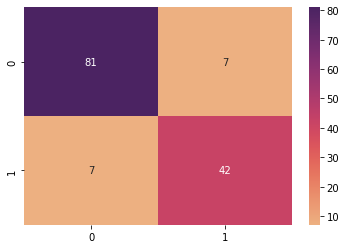

In [15]:
confusion_matrix(y_test, pred)
sns.heatmap(confusion_matrix(y_test, pred), annot=True,cmap ='flare' )

In [16]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        88
           1       0.86      0.86      0.86        49

    accuracy                           0.90       137
   macro avg       0.89      0.89      0.89       137
weighted avg       0.90      0.90      0.90       137



In [17]:
dtree.feature_importances_

array([0.04560298, 0.01189066, 0.02122669, 0.13649257, 0.71590682,
       0.03825416, 0.03062611])

Text(0, 0.5, 'Supplier Feature')

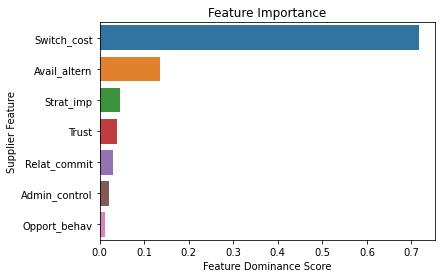

In [18]:
imp = np.array(dtree.feature_importances_)
cols = np.array(df.columns[1:])
data = {'variable_names':cols,'imp_variables':imp}
v = pd.DataFrame(data)
v.sort_values(by=['imp_variables'], ascending=False,inplace=True)

sns.barplot(x=v['imp_variables'], y=v['variable_names'])
plt.title('Feature Importance')
plt.xlabel('Feature Dominance Score')
plt.ylabel('Supplier Feature')

In [19]:
dominat_variables = dtree_gini.feature_importances_
df_dominat = pd.DataFrame({'Feature_names':X_train.columns, 'Importance':dominat_variables})
print(df_dominat.sort_values(by='Importance', ascending = False))

   Feature_names  Importance
4    Switch_cost    0.715907
3   Avail_altern    0.136493
0      Strat_imp    0.084871
5          Trust    0.038254
1   Opport_behav    0.011891
2  Admin_control    0.010636
6   Relat_commit    0.001949
